## Deep Learning

---

<br>

**This project was part of a lecture series on Machine Learning methods for Economic Research during my
master studies and was implemented with the help of my teachers.**

<br>

Contents:

* A simple image classification neural network.
* A similar neural network built from scratch without the use of tensorflow/keras.
* Two text analysis examples from keras.


---

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

# I think the warning arises due to incompatibility of current numpy and tensorflow
# possible fix: check numpy version and install a numpy version suitable for current tensorflow

1.14.0
2.2.4-tf


## Character recognition

- A 2012 paper by Krizhevsky, Sutskever, and Hinton boosted the popularity of deep learning by showing that it performed much better than any state-of-the-art model on a computer vision classification task.
- They used a neural network with five convolutional layers and 60 million parameters, trained on GPUs
- Today's example will be an image classification as well, but to keep it simple our task will be to recognize checkmarks and crosses, digitized in a small boolean matrix, with errors. 
- This can be thought of as a minimal version of OCR. Someone may have scanned a form where different boxes could be ticked and the low resolution result contains some errors, so we can't simply compare the matrix with an ideal version of the symbol. 

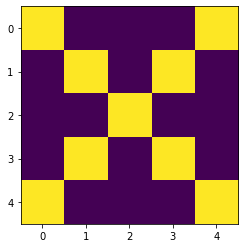

In [31]:
# Ideal versions of the two symbols

cross = np.array([
    [1,0,0,0,1],
    [0,1,0,1,0],
    [0,0,1,0,0],
    [0,1,0,1,0],
    [1,0,0,0,1]], dtype='bool')

checkmark = np.array([
    [0,0,0,0,1],
    [0,0,0,1,0],
    [0,0,0,1,0],
    [1,0,1,0,0],
    [0,1,0,0,0]], dtype='bool')

plt.imshow(cross)

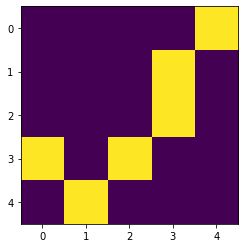

In [32]:
plt.imshow(checkmark)

In [33]:
# take symbol, create version with errors
# create random error matrix, then flip pixels with xor
np.random.seed(0)

def modify(type):
    p = 3/25
    r = np.random.choice(a=[False, True], size=(5, 5), p=[1-p, p])
    # return np.bitwise_xor(np.zeros((5,5), dtype="bool"), r) # To see what happens if there is no information in sample
    if type==1:
        return np.bitwise_xor(checkmark, r)
    elif type==0:
        return np.bitwise_xor(cross, r)
    else:
        return np.bitwise_xor(np.zeros((5,5), dtype="bool"), r)

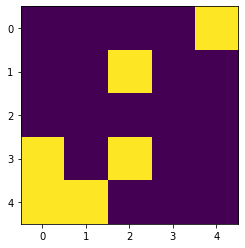

In [34]:
# we can see how our checkmark image is modified with errors
plt.imshow(modify(1))

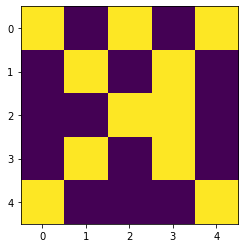

In [35]:
# we can see how our cross image is modified with errors
plt.imshow(modify(0))

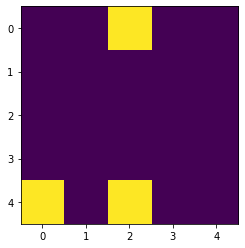

In [36]:
# we can see how our image is modified with errors, when no information is provided in our sample, basically not checks or cross
plt.imshow(modify(1.5))

In [37]:
# create training and test data (with checkmark, x or empty)
y_train = np.random.randint(-1, 2, size=100)
x_train = [modify(y).reshape((25,1)) for y in y_train] # list of 100 images following y_train

y_test = np.random.randint(-1, 2, size=100)
x_test = [modify(y).reshape((25,1)) for y in y_test] 

In [38]:
y_test

array([-1,  1,  1, -1,  1,  1, -1,  1,  0,  1, -1, -1, -1,  0,  1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1, -1,  0, -1,  0, -1, -1,  0, -1,  0,  0,
        0, -1,  1, -1, -1,  0,  0,  1,  0,  1, -1,  0, -1,  1,  1,  1, -1,
        1,  1, -1, -1,  1,  0,  1,  0, -1, -1, -1, -1, -1, -1, -1,  0,  1,
        1, -1, -1, -1,  1,  0,  0,  0,  1,  0, -1, -1,  1,  0,  1,  1,  0,
        0, -1,  0,  0, -1, -1, -1, -1,  0,  1,  1,  1, -1,  0,  1])

In [39]:
y_train

array([-1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1, -1,  0,  1,  1,  0,  1,
        0, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  0,
        1, -1,  0,  1,  1,  1,  0, -1, -1, -1, -1,  1,  1, -1, -1, -1,  0,
        1, -1, -1,  0, -1,  1,  0,  0,  0, -1, -1, -1,  0,  0,  1,  0, -1,
       -1,  0,  1,  0,  0,  0, -1, -1, -1,  0,  1,  0,  0, -1, -1,  0,  1,
       -1,  1,  1,  0,  0,  0,  1, -1, -1,  0, -1,  1,  1, -1,  1])

In [40]:
x_train

[array([[ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]]),
 array([[ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]]),
 array([[False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [F

In [41]:
# Prepare sample 

num_classes = 3

y_train = np.array(y_train).reshape(100, 1)
y_test = np.array(y_test).reshape(100, 1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = np.array(x_train).reshape(100, 25)
x_test = np.array(x_test).reshape(100, 25)

In [42]:
# Build neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

batch_size = 16
epochs = 20

model = Sequential()
model.add(Dense(25, activation='relu', input_shape=(25,)))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 78        
Total params: 728
Trainable params: 728
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Train and evaluate 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 100 samples, validate on 100 samples
Epoch 1/20
100/100 [==============================] - 0s 3ms/sample - loss: 1.2329 - acc: 0.3400 - val_loss: 1.1075 - val_acc: 0.4100
Epoch 2/20
100/100 [==============================] - 0s 313us/sample - loss: 1.1280 - acc: 0.3300 - val_loss: 1.0494 - val_acc: 0.4100
Epoch 3/20
100/100 [==============================] - 0s 378us/sample - loss: 1.0609 - acc: 0.3700 - val_loss: 1.0032 - val_acc: 0.4600
Epoch 4/20
100/100 [==============================] - 0s 469us/sample - loss: 1.0070 - acc: 0.4100 - val_loss: 0.9608 - val_acc: 0.4800
Epoch 5/20
100/100 [==============================] - 0s 378us/sample - loss: 0.9535 - acc: 0.4500 - val_loss: 0.9223 - val_acc: 0.5200
Epoch 6/20
100/100 [==============================] - 0s 469us/sample - loss: 0.9075 - acc: 0.5400 - val_loss: 0.8850 - val_acc: 0.5800
Epoch 7/20
100/100 [==============================] - 0s 569us/sample - loss: 0.8647 - acc: 0.6200 - val_loss: 0.8526 - val_acc: 0.6800
Epoc

In [44]:
history.history

{'loss': [1.232886972427368,
  1.127955617904663,
  1.060888090133667,
  1.0069728994369507,
  0.9534780693054199,
  0.9075234413146973,
  0.8646875238418579,
  0.8245443630218506,
  0.7873314142227172,
  0.7533720636367798,
  0.7229778265953064,
  0.6927094173431396,
  0.6653929901123047,
  0.6361357617378235,
  0.6093360328674317,
  0.5827275109291077,
  0.5574518036842346,
  0.5336821460723877,
  0.5105236220359802,
  0.4885260272026062],
 'acc': [0.34,
  0.33,
  0.37,
  0.41,
  0.45,
  0.54,
  0.62,
  0.66,
  0.7,
  0.74,
  0.75,
  0.78,
  0.78,
  0.79,
  0.79,
  0.83,
  0.83,
  0.84,
  0.87,
  0.89],
 'val_loss': [1.1075110054016113,
  1.0493545293807984,
  1.0031944274902345,
  0.9608201313018799,
  0.9222904253005981,
  0.8849884939193725,
  0.8525676727294922,
  0.8209284830093384,
  0.7925277900695801,
  0.7652782917022705,
  0.739429280757904,
  0.7142304086685181,
  0.6900486874580384,
  0.6666736018657684,
  0.6427925229072571,
  0.620424599647522,
  0.5991872143745423,
  0

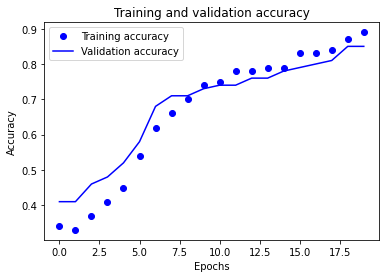

In [45]:
history_dict = history.history
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(range(epochs), acc, 'bo', label='Training accuracy')
plt.plot(range(epochs), val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
# this was a very basic attempt at discovering the potential and workings of neural networks.

## Character recognition

A common application of deep learning is to recognize handwriting with the MNIST dataset. You can find a Keras example for the MNIST dataset here: https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py

Explore some variations of the network, e.g. add a layer or more epochs. Is the accuracy increasing? Also, try out different sample sizes and pixel error probabilities p and see how the model reacts. (Think about what happens if p is close to 1?) Can you get the model to overfit?

- Add a layer: In the following example, accuracy decreases.


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 130       
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 18        
Total params: 798
Trainable params: 798
Non-trainable params: 0
_________________________________________________________________
Train on 100 samples, validate on 100 samples
Epoch 1/20
100/100 [==============================] - 1s 5ms/sample - loss: 1.1104 - acc: 0.3600 - val_loss: 1.1052 - val_acc: 0.3800
Epoch 2/20
100/100 [==============================] - 0s 469us/sample - loss: 1.0543 - acc: 0.3800 - val_loss: 1.0687 - val_acc: 0.3700
Epoch 3/20
100/100 [==============================] - 0s 534us/sample 

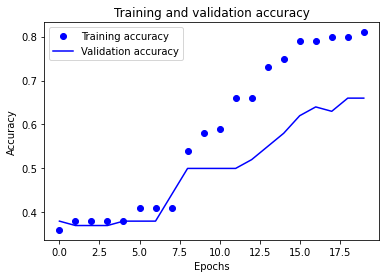

In [47]:
# Build, train and evaluate neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

batch_size = 16
epochs = 20

model = Sequential()
model.add(Dense(25, activation='relu', input_shape=(25,)))
model.add(Dense(5, activation='relu', input_shape=(25,)))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',  # for multi-class classification problem
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

history_dict = history.history
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(range(epochs), acc, 'bo', label='Training accuracy')
plt.plot(range(epochs), val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- More epochs: Accuracy improves

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 78        
Total params: 728
Trainable params: 728
Non-trainable params: 0
_________________________________________________________________
Train on 100 samples, validate on 100 samples
Epoch 1/100
100/100 [==============================] - 0s 5ms/sample - loss: 1.3667 - acc: 0.2400 - val_loss: 1.2819 - val_acc: 0.2900
Epoch 2/100
100/100 [==============================] - 0s 404us/sample - loss: 1.1988 - acc: 0.2700 - val_loss: 1.1787 - val_acc: 0.3100
Epoch 3/100
100/100 [==============================] - 0s 439us/sample - loss: 1.1014 - acc: 0.3000 - val_loss: 1.1070 - val_acc: 0.3700
Epoch 4/100
100/100 [==============================] - 0s 469us

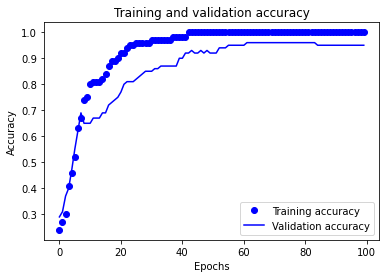

In [50]:
# Build, train and evaluate neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

batch_size = 16
epochs = 100

model = Sequential()
model.add(Dense(25, activation='relu', input_shape=(25,)))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

history_dict = history.history
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(range(epochs), acc, 'bo', label='Training accuracy')
plt.plot(range(epochs), val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- Increase sample size: Accuracy increases

In [51]:
# create train and test data (with checkmark, x or empty)
y_train = np.random.randint(-1, 2, size=1000)
x_train = [modify(y).reshape((25,1)) for y in y_train] 

y_test = np.random.randint(-1, 2, size=1000)
x_test = [modify(y).reshape((25,1)) for y in y_test] 

y_train = np.array(y_train).reshape(1000, 1)
y_test = np.array(y_test).reshape(1000, 1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = np.array(x_train).reshape(1000, 25)
x_test = np.array(x_test).reshape(1000, 25)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 78        
Total params: 728
Trainable params: 728
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/20
1000/1000 [==============================] - 1s 685us/sample - loss: 0.9655 - acc: 0.5190 - val_loss: 0.8025 - val_acc: 0.6990
Epoch 2/20
1000/1000 [==============================] - 0s 270us/sample - loss: 0.6643 - acc: 0.7830 - val_loss: 0.5596 - val_acc: 0.8540
Epoch 3/20
1000/1000 [==============================] - 0s 263us/sample - loss: 0.4468 - acc: 0.9060 - val_loss: 0.3775 - val_acc: 0.9090
Epoch 4/20
1000/1000 [==============================] - 

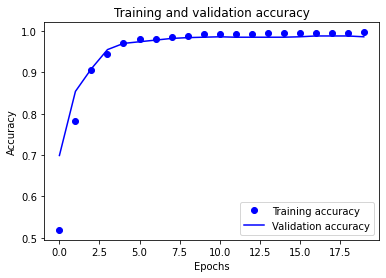

In [52]:
# Build, train and evaluate neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

batch_size = 16
epochs = 20

model = Sequential()
model.add(Dense(25, activation='relu', input_shape=(25,)))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

history_dict = history.history
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(range(epochs), acc, 'bo', label='Training accuracy')
plt.plot(range(epochs), val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- Change error probability

If p is 0 or if p is 1, no information is lost from the perfect original image. p=0.5 leads to maximum (and complete) information loss.

(see overfit example below)

- Overfit?

Two examples:

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 78        
Total params: 728
Trainable params: 728
Non-trainable params: 0
_________________________________________________________________
Train on 25 samples, validate on 100 samples
Epoch 1/100
25/25 [==============================] - 0s 18ms/sample - loss: 1.1773 - acc: 0.3200 - val_loss: 1.1722 - val_acc: 0.2700
Epoch 2/100
25/25 [==============================] - 0s 1ms/sample - loss: 1.1055 - acc: 0.3600 - val_loss: 1.1374 - val_acc: 0.2600
Epoch 3/100
25/25 [==============================] - 0s 1ms/sample - loss: 1.0599 - acc: 0.4000 - val_loss: 1.1110 - val_acc: 0.2700
Epoch 4/100
25/25 [==============================] - 0s 1ms/sample - loss

Epoch 57/100
25/25 [==============================] - 0s 1ms/sample - loss: 0.2942 - acc: 0.8800 - val_loss: 0.5759 - val_acc: 0.7300
Epoch 58/100
25/25 [==============================] - 0s 1ms/sample - loss: 0.2888 - acc: 0.8800 - val_loss: 0.5699 - val_acc: 0.7300
Epoch 59/100
25/25 [==============================] - 0s 886us/sample - loss: 0.2827 - acc: 0.9200 - val_loss: 0.5656 - val_acc: 0.7400
Epoch 60/100
25/25 [==============================] - 0s 1ms/sample - loss: 0.2771 - acc: 0.9200 - val_loss: 0.5607 - val_acc: 0.7400
Epoch 61/100
25/25 [==============================] - 0s 1ms/sample - loss: 0.2723 - acc: 0.9200 - val_loss: 0.5562 - val_acc: 0.7400
Epoch 62/100
25/25 [==============================] - 0s 886us/sample - loss: 0.2670 - acc: 0.9200 - val_loss: 0.5519 - val_acc: 0.7400
Epoch 63/100
25/25 [==============================] - 0s 1ms/sample - loss: 0.2621 - acc: 0.9200 - val_loss: 0.5477 - val_acc: 0.7500
Epoch 64/100
25/25 [==============================] - 0s 1

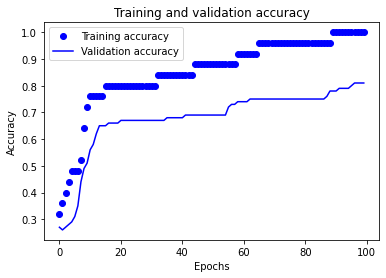

In [53]:
# 1. reduce sample size and increase epochs

# create train and test data (with checkmark, x or empty)
y_train = np.random.randint(-1, 2, size=25)
x_train = [modify(y).reshape((25,1)) for y in y_train] # list of 100 images following y_train

y_test = np.random.randint(-1, 2, size=100)
x_test = [modify(y).reshape((25,1)) for y in y_test] 

y_train = np.array(y_train).reshape(25, 1)
y_test = np.array(y_test).reshape(100, 1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = np.array(x_train).reshape(25, 25)
x_test = np.array(x_test).reshape(100, 25)

# Build, train and evaluate neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

batch_size = 16
epochs = 100

model = Sequential()
model.add(Dense(25, activation='relu', input_shape=(25,)))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

history_dict = history.history
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(range(epochs), acc, 'bo', label='Training accuracy')
plt.plot(range(epochs), val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 78        
Total params: 728
Trainable params: 728
Non-trainable params: 0
_________________________________________________________________
Train on 100 samples, validate on 100 samples
Epoch 1/100
100/100 [==============================] - 1s 5ms/sample - loss: 1.3077 - acc: 0.4700 - val_loss: 1.3709 - val_acc: 0.3300
Epoch 2/100
100/100 [==============================] - 0s 424us/sample - loss: 1.2075 - acc: 0.4500 - val_loss: 1.3183 - val_acc: 0.3400
Epoch 3/100
100/100 [==============================] - 0s 469us/sample - loss: 1.1667 - acc: 0.4600 - val_loss: 1.2721 - val_acc: 0.3400
Epoch 4/100
100/100 [==============================] - 0s 363us

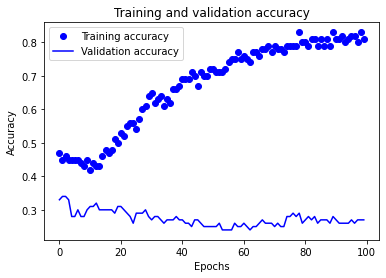

In [54]:
# 2. increases error probability (remember what p=1/2 means)


def modify(type):
    p = 1/2
    r = np.random.choice(a=[False, True], size=(5, 5), p=[1-p, p])
    # return np.bitwise_xor(np.zeros((5,5), dtype="bool"), r) # To see what happens if there is no information in sample
    if type==1:
        return np.bitwise_xor(checkmark, r)
    elif type==0:
        return np.bitwise_xor(cross, r)
    else:
        return np.bitwise_xor(np.zeros((5,5), dtype="bool"), r)
    
# 1. reduce sample size and increase epochs

# create train and test data (with checkmark, x or empty)
y_train = np.random.randint(-1, 2, size=100)
x_train = [modify(y).reshape((25,1)) for y in y_train] # list of 100 images following y_train

y_test = np.random.randint(-1, 2, size=100)
x_test = [modify(y).reshape((25,1)) for y in y_test] 

y_train = np.array(y_train).reshape(100, 1)
y_test = np.array(y_test).reshape(100, 1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = np.array(x_train).reshape(100, 25)
x_test = np.array(x_test).reshape(100, 25)


# Build, train and evaluate neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

batch_size = 16
epochs = 100

model = Sequential()
model.add(Dense(25, activation='relu', input_shape=(25,)))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

history_dict = history.history
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(range(epochs), acc, 'bo', label='Training accuracy')
plt.plot(range(epochs), val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Assume it has been ensured that all the form's questions have been answered, i.e. there are only two categories and no empty boxes. Adjust the code above to reflect this (both in the sample creation and the neural network). The loss function should also be changed to binary crossentropy in this case (https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class).

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 26        
Total params: 676
Trainable params: 676
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 100 samples, validate on 100 samples
Epoch 1/20
100/100 [==============================] - 1s 6ms/sample - loss: 0.7426 - acc: 0.5600 - val_loss: 0.7674 - val_acc: 0.5100
Epoch 2/20
100/100 [==============================] - 0s 504us/sample - loss: 0.7243 - acc: 0.5800 - val_loss: 0.7493 - val_acc: 0.5100
Epoch 3/20
100/100 [==============================] - 0s 469us/sample - loss: 0.7103 - acc: 0.5600 - val_los

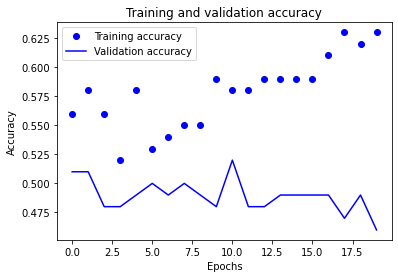

In [30]:
# create train and test data
y_train = np.random.randint(0, 2, size=100)            # range is changed to (0,2) - 2 categories i.e. 0,1
x_train = [modify(y).reshape((25,1)) for y in y_train] # list of 100 images following y_train

y_test = np.random.randint(0, 2, size=100)
x_test = [modify(y).reshape((25,1)) for y in y_test] 

# Prepare sample 

y_train = np.array(y_train).reshape(100, 1)
y_test = np.array(y_test).reshape(100, 1)

x_train = np.array(x_train).reshape(100, 25)
x_test = np.array(x_test).reshape(100, 25)

# Build, train and evaluate neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

batch_size = 16
epochs = 20

model = Sequential()
model.add(Dense(25, activation='relu', input_shape=(25,)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

history_dict = history.history
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(range(epochs), acc, 'bo', label='Training accuracy')
plt.plot(range(epochs), val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Neural network from scratch

To better understand how neural network are built and trained, the following example shows a model that performs a similar task - recognizing digits - but is written without libraries that abstract from the details. 

This example is adapted from the book ["Data Science from Scratch" by Joel Grus (2015)](https://github.com/joelgrus/data-science-from-scratch).

In [31]:
from collections import Counter
from functools import partial
import math, random
import matplotlib
import matplotlib.pyplot as plt

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sigmoid(t):
    return 1 / (1 + math.exp(-t))

def neuron_output(weights, inputs):
    return sigmoid(dot(weights, inputs))

def feed_forward(neural_network, input_vector):
    """takes in a neural network (represented as a list of lists of lists of weights)
    and returns the output from forward-propagating the input"""
    outputs = []
    for layer in neural_network:
        input_with_bias = input_vector + [1]             # add a bias input
        output = [neuron_output(neuron, input_with_bias) # compute the output
                  for neuron in layer]                   # for this layer
        outputs.append(output)                           # and remember it
        # the input to the next layer is the output of this one
        input_vector = output
    return outputs

Note that the network lists layers, which in turn list weights. If we had the weights already, we could simply use the network with feed_forward. But unlike the "xor" task above, it would  be difficult to manually pick weights for (even such simplified) image recognition. Hence we need a function to learn weights:

In [33]:
def backpropagate(network, input_vector, target):
    hidden_outputs, outputs = feed_forward(network, input_vector)

    # the output * (1 - output) is from the derivative of sigmoid
    output_deltas = [output * (1 - output) * (output - target[i])
                     for i, output in enumerate(outputs)]

    # adjust weights for output layer (network[-1])
    for i, output_neuron in enumerate(network[-1]):
        for j, hidden_output in enumerate(hidden_outputs + [1]):
            output_neuron[j] -= output_deltas[i] * hidden_output

    # back-propagate errors to hidden layer
    hidden_deltas = [hidden_output * (1 - hidden_output) *
                      dot(output_deltas, [n[i] for n in network[-1]])
                     for i, hidden_output in enumerate(hidden_outputs)]

    # adjust weights for hidden layer (network[0])
    for i, hidden_neuron in enumerate(network[0]):
        for j, input in enumerate(input_vector + [1]):
            hidden_neuron[j] -= hidden_deltas[i] * input

We later want to illustrate what (weights) the network has learned:

In [34]:
def show_weights(neuron_idx):
    weights = network[0][neuron_idx]
    grid = [weights[row:(row+5)] # turn the weights into a 5x5 grid
            for row in range(0,25,5)] # [weights[0:5], ..., weights[20:25]]
    ax = plt.gca() # to use hatching, we'll need the axis
    ax.imshow(grid, # here same as plt.imshow
              cmap=matplotlib.cm.RdYlGn, # red (negative) to green (positive)
              interpolation='none') # plot blocks as blocks

The next step is the actual task/data:

In [35]:
raw_digits = [
          """11111
             1...1
             1...1
             1...1
             11111""",

          """..1..
             ..1..
             ..1..
             ..1..
             ..1..""",

          """11111
             ....1
             11111
             1....
             11111""",

          """11111
             ....1
             11111
             ....1
             11111""",

          """1...1
             1...1
             11111
             ....1
             ....1""",

          """11111
             1....
             11111
             ....1
             11111""",

          """11111
             1....
             11111
             1...1
             11111""",

          """11111
             ....1
             ....1
             ....1
             ....1""",

          """11111
             1...1
             11111
             1...1
             11111""",

          """11111
             1...1
             11111
             ....1
             11111"""]

def make_digit(raw_digit):
    return [1 if c == '1' else 0
            for row in raw_digit.split("\n")
            for c in row.strip()]

inputs = list(map(make_digit, raw_digits))

# Note that the output the network "sees" is a list:
targets = [[1 if i == j else 0 for i in range(10)]
            for j in range(10)]

random.seed(0)   # to get repeatable results
input_size = 25  # each input is a vector of length 25
num_hidden = 5   # we'll have 5 neurons in the hidden layer
output_size = 10 # we need 10 outputs for each input

# each hidden neuron has one weight per input, plus a bias weight
hidden_layer = [[random.random() for __ in range(input_size + 1)]
                for __ in range(num_hidden)]

# each output neuron has one weight per hidden neuron, plus a bias weight
output_layer = [[random.random() for __ in range(num_hidden + 1)]
                for __ in range(output_size)]

# the network starts out with random weights
network = [hidden_layer, output_layer]

The network is trained and then tested on some new digits:

In [36]:
# 10,000 iterations seems enough to converge
for __ in range(10000):
    for input_vector, target_vector in zip(inputs, targets):
        backpropagate(network, input_vector, target_vector)

def predict(input):
    return feed_forward(network, input)[-1]

for i, input in enumerate(inputs):
    outputs = predict(input)
    print(i, [round(p,2) for p in outputs])

print()


print(""".@@@.
...@@
..@@.
...@@
.@@@.""")
print([round(x, 2) for x in
        predict(  [0,1,1,1,0,    # .@@@.
                    0,0,0,1,1,    # ...@@
                    0,0,1,1,0,    # ..@@.
                    0,0,0,1,1,    # ...@@
                    0,1,1,1,0])]) # .@@@.
print()

print(""".@@@.
@..@@
.@@@.
@..@@
.@@@.""")
print([round(x, 2) for x in
        predict(  [0,1,1,1,0,    # .@@@.
                    1,0,0,1,1,    # @..@@
                    0,1,1,1,0,    # .@@@.
                    1,0,0,1,1,    # @..@@
                    0,1,1,1,0])]) # .@@@.
print()

0 [0.96, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.03, 0.0]
1 [0.0, 0.96, 0.03, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2 [0.0, 0.02, 0.96, 0.0, 0.0, 0.03, 0.0, 0.0, 0.0, 0.0]
3 [0.0, 0.03, 0.0, 0.97, 0.0, 0.0, 0.0, 0.02, 0.0, 0.03]
4 [0.0, 0.02, 0.0, 0.0, 0.99, 0.0, 0.0, 0.01, 0.0, 0.0]
5 [0.0, 0.0, 0.02, 0.0, 0.0, 0.96, 0.01, 0.0, 0.02, 0.02]
6 [0.0, 0.0, 0.01, 0.0, 0.01, 0.01, 0.99, 0.0, 0.0, 0.0]
7 [0.02, 0.0, 0.0, 0.02, 0.0, 0.0, 0.0, 0.97, 0.0, 0.0]
8 [0.03, 0.0, 0.0, 0.0, 0.0, 0.02, 0.0, 0.0, 0.96, 0.03]
9 [0.0, 0.0, 0.0, 0.01, 0.0, 0.02, 0.0, 0.0, 0.03, 0.95]

.@@@.
...@@
..@@.
...@@
.@@@.
[0.0, 0.0, 0.0, 0.94, 0.0, 0.0, 0.0, 0.01, 0.0, 0.13]

.@@@.
@..@@
.@@@.
@..@@
.@@@.
[0.0, 0.0, 0.0, 0.0, 0.0, 0.59, 0.0, 0.0, 0.95, 1.0]



In the first part of the above output we see that training digits have been learned. 
Then the new 3 is recognized quite well.
The 8 in the last output was perceived as a 9, although closely followed by 8. It is also perceived as similar to a 5.

What do the weights in the hidden neurons look like?

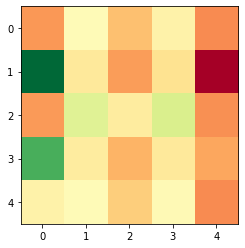

In [37]:
show_weights(0)

In [38]:
# and the numbers for a grid:
neuron_idx = 0
weights = network[0][neuron_idx]
grid = [weights[row:(row+5)]  for row in range(0,25,5)] 
grid

[[-1.9762574257741532,
  1.7438696775654206,
  -0.8023759953213773,
  1.2448320249180904,
  -2.3094045559305587],
 [10.477928152312646,
  0.7837985890347726,
  -1.9055501246984408,
  0.4765969541523558,
  -6.5703617792888735],
 [-1.9327180016552672,
  3.320756874805275,
  0.8890450126101805,
  3.571874223145094,
  -2.20231028062384],
 [7.70923888277809,
  0.9097462559682401,
  -1.2260773747397238,
  0.8102172359965896,
  -1.623426609353764],
 [1.275911234393042,
  1.6955954133338342,
  -0.34426089773566526,
  1.649747596989139,
  -2.348536561846447]]

In [39]:
len(weights)

26

In [40]:
weights[25] # bias

-4.928840920008189

In [41]:
len(network[0])

5

In [42]:
len(network[1])

10

In [43]:
network[1][6][0] # How does this hidden neuron contribute to recognizing the digit as 6?

12.963794505040527

In [44]:
network[1][7][0]

-12.081421209491934

In [45]:
left_column_only = [1, 0, 0, 0, 0] * 5
print(feed_forward(network, left_column_only)[0][0]) # 1.0

center_middle_row=[0,0,0,0,0]*2+[0,1,1,1,0]+[0,0,0,0,0]*2 
print(feed_forward(network, center_middle_row)[0][0]) # 0.95

right_column_only = [0, 0, 0, 0, 1] * 5
print(feed_forward(network, right_column_only)[0][0]) # 0.0

0.9999757061230374
0.9454650524875013
2.0967428729819267e-09


In [46]:
left_column_only

[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]

Note that, unlike in the previous example, here the digits don't contain errors in the training sample (with 10 observations for 10 digits). Training accuracy would be 100%, the output numbers instead refers to the respective output node's activation, i.e. the value of the sigmoid function. 

## Keras text analysis examples

For more examples of practical applications with Keras specifically, see the official github repository: https://keras.io/examples/

Let's have a look at these two examples:

*imdb_lstm.py Trains an **LSTM model** on the IMDB sentiment classification task.*

*pretrained_word_embeddings.py Loads **pre-trained word embeddings** (GloVe embeddings) into a frozen Keras Embedding layer, and uses it to train a text classification model on the 20 Newsgroup dataset.*


![Illustration from Wikipedia article on Recurrent Neural Networks](https://upload.wikimedia.org/wikipedia/commons/b/b5/Recurrent_neural_network_unfold.svg)

Recurrent neural networks take the sequence structure into account. LSTM RNNs have long and short term memory, so that a longer history (of previously seen data) can be "remembered".

In [48]:
# https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py

'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5, # was 15
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
17465344/17464789 [==============================] - 1s 0us/step


C:\Users\johnd\miniconda3\envs\tensor_env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\johnd\miniconda3\envs\tensor_env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 219s 9ms/sample - loss: 0.4570 - acc: 0.7862 - val_loss: 0.4114 - val_acc: 0.8133
Epoch 2/5
25000/25000 [==============================] - 227s 9ms/sample - loss: 0.2992 - acc: 0.8779 - val_loss: 0.4035 - val_acc: 0.8163
Epoch 3/5
25000/25000 [==============================] - 214s 9ms/sample - loss: 0.2099 - acc: 0.9179 - val_loss: 0.4469 - val_acc: 0.8302
Epoch 4/5
25000/25000 [==============================] - 214s 9ms/sample - loss: 0.1437 - acc: 0.9469 - val_loss: 0.6067 - val_acc: 0.8204
Epoch 5/5
25000/25000 [==============================] - 32s 1ms/sample - loss: 0.5373 - acc: 0.8246
Test score: 0.5373109322

The following example uses the word embeddings from [GloVe](https://nlp.stanford.edu/projects/glove/). The network in the example thus starts with a pre-trained, frozen layer of word embeddings instead of learning them from scratch at the same time as training the rest of the network. The modular nature of neural networks allows the transfer of pre-trained networks between applications (not just in text analysis, but also in computer vision to recognize objects, etc.). Such layers can also be unfrozen.

The model also features convolution layers. These layers split the input into multiple separate parts. By contrast to the densely connected layers, which process the entire input and learn global patterns, convolution layers learn local patterns. These can then be recognized in other locations as well and can be used by later layers to learn larger patterns. 

In [49]:
# https://github.com/keras-team/keras/blob/master/examples/pretrained_word_embeddings.py

'''This script loads pre-trained word embeddings (GloVe embeddings)
into a frozen Keras Embedding layer, and uses it to
train a text classification model on the 20 Newsgroup dataset
(classification of newsgroup messages into 20 different categories).
GloVe embedding data can be found at:
http://nlp.stanford.edu/data/glove.6B.zip
(source page: http://nlp.stanford.edu/projects/glove/)
20 Newsgroup data can be found at:
http://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-20/www/data/news20.html
'''

from __future__ import print_function

import os
import sys
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant


BASE_DIR = r'C:\Users\johnd\OneDrive\Desktop\ML lecture\lecture7'
GLOVE_DIR = os.path.join(BASE_DIR, 'glove.6B')
TEXT_DATA_DIR = os.path.join(BASE_DIR, '20_newsgroup')
MAX_SEQUENCE_LENGTH = 1000
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

# first, build index mapping words in the embeddings set
# to their embedding vector

print('Indexing word vectors.')

embeddings_index = {}
with open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'), encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

# second, prepare text samples and their labels
print('Processing text dataset')

texts = []  # list of text samples
labels_index = {}  # dictionary mapping label name to numeric id
labels = []  # list of label ids
for name in sorted(os.listdir(TEXT_DATA_DIR)):
    path = os.path.join(TEXT_DATA_DIR, name)
    if os.path.isdir(path):
        label_id = len(labels_index)
        labels_index[name] = label_id
        for fname in sorted(os.listdir(path)):
            if fname.isdigit():
                fpath = os.path.join(path, fname)
                args = {} if sys.version_info < (3,) else {'encoding': 'latin-1'}
                with open(fpath, **args) as f:
                    t = f.read()
                    i = t.find('\n\n')  # skip header
                    if 0 < i:
                        t = t[i:]
                    texts.append(t)
                labels.append(label_id)

print('Found %s texts.' % len(texts))

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

print('Preparing embedding matrix.')

# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

print('Training model.')

# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(len(labels_index), activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=5, # was 10
          validation_data=(x_val, y_val))

Indexing word vectors.
Found 400000 word vectors.
Processing text dataset
Found 19997 texts.
Found 174074 unique tokens.
Shape of data tensor: (19997, 1000)
Shape of label tensor: (19997, 20)
Preparing embedding matrix.
Training model.
Train on 15998 samples, validate on 3999 samples
Epoch 1/5
15998/15998 [==============================] - 142s 9ms/sample - loss: 2.4569 - acc: 0.1963 - val_loss: 1.8897 - val_acc: 0.3618
Epoch 2/5
15998/15998 [==============================] - 140s 9ms/sample - loss: 1.5641 - acc: 0.4531 - val_loss: 1.3539 - val_acc: 0.5089
Epoch 3/5
15998/15998 [==============================] - 141s 9ms/sample - loss: 1.1990 - acc: 0.5849 - val_loss: 1.0846 - val_acc: 0.6299
Epoch 4/5
15998/15998 [==============================] - 139s 9ms/sample - loss: 0.9697 - acc: 0.6712 - val_loss: 1.0419 - val_acc: 0.6487
Epoch 5/5
15998/15998 [==============================] - 142s 9ms/sample - loss: 0.8190 - acc: 0.7212 - val_loss: 0.9951 - val_acc: 0.6674


In [50]:
score, acc = model.evaluate(x_val, y_val,
                            batch_size=128)
print('Test score:', score)
print('Test accuracy:', acc)

3999/3999 [==============================] - 13s 3ms/sample - loss: 0.9951 - acc: 0.6674
Test score: 0.9951499680275617
Test accuracy: 0.6674169
